# Regressão Linear com Statsmodels e Scikit-learn
Neste notebook, demonstraremos como realizar uma regressão linear usando as bibliotecas Statsmodels e Scikit-learn, utilizando um conjunto de dados simples relacionado ao número de horas estudadas e às notas obtidas por alunos em uma prova.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

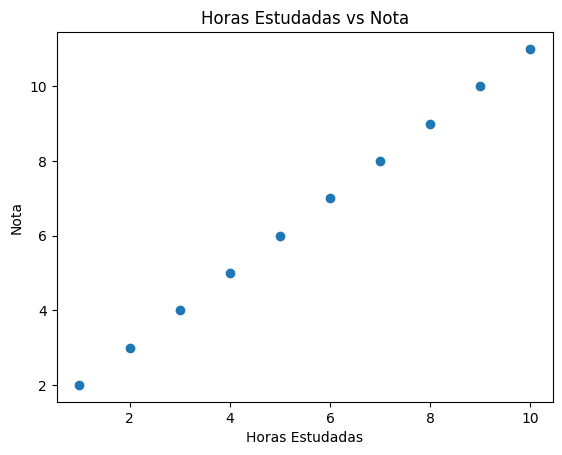

In [3]:
# Dados: horas estudadas vs nota obtida
dados = {'HorasEstudadas': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'Nota': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
df = pd.DataFrame(dados)

# Visualizando os dados
plt.scatter(df['HorasEstudadas'], df['Nota'])
plt.title('Horas Estudadas vs Nota')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()

## Regressão Linear com Statsmodels

/home/roger/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


                            OLS Regression Results                            
Dep. Variable:                   Nota   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.177e+31
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          5.83e-122
Time:                        19:50:07   Log-Likelihood:                 322.58
No. Observations:                  10   AIC:                            -641.2
Df Residuals:                       8   BIC:                            -640.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0000   1.81e-15   5.53e

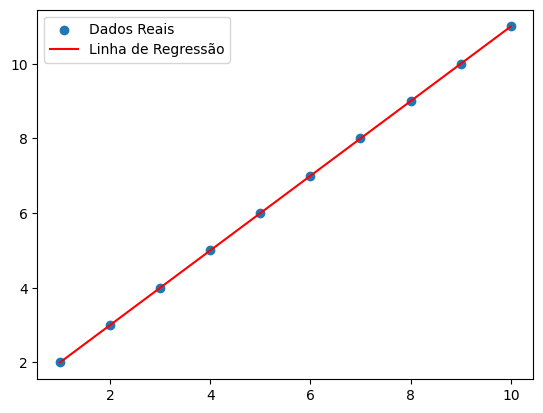

In [4]:
X = sm.add_constant(df['HorasEstudadas'])  # Adicionando constante
y = df['Nota']

# Criando o modelo e ajustando aos dados
modelo_statsmodels = sm.OLS(y, X).fit()

# Sumário do modelo
print(modelo_statsmodels.summary())

# Predições
predicoes_statsmodels = modelo_statsmodels.predict(X)

# Plotando as predições
plt.scatter(df['HorasEstudadas'], df['Nota'], label='Dados Reais')
plt.plot(df['HorasEstudadas'], predicoes_statsmodels, color='red', label='Linha de Regressão')
plt.legend()
plt.show()

## Regressão Linear com Scikit-learn

MSE: 9.860761315262648e-32


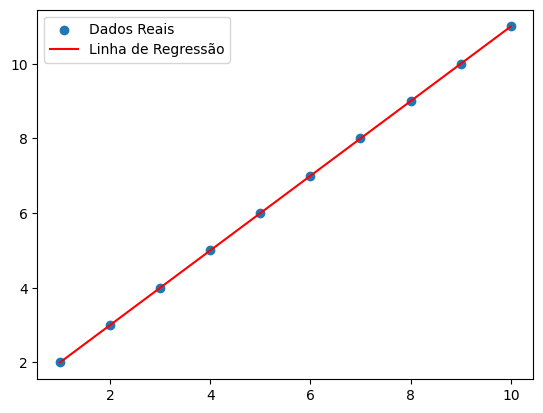

In [5]:
X_sklearn = df[['HorasEstudadas']]  # Scikit-learn espera um array 2D para X
y_sklearn = df['Nota']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)

# Criando e treinando o modelo
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Predições
predicoes_sklearn = modelo_sklearn.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, predicoes_sklearn)
print(f'MSE: {mse}')

# Plotando as predições (usando todos os dados para visualização)
plt.scatter(df['HorasEstudadas'], df['Nota'], label='Dados Reais')
plt.plot(df['HorasEstudadas'], modelo_sklearn.predict(X_sklearn), color='red', label='Linha de Regressão')
plt.legend()
plt.show()